# **HW5**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift
import random

Download required images to the colab working directory

In [4]:
!gdown --id 1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
!gdown --id 1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
!gdown --id 14zOA1aCwo4lneA1jETn8OdSmGe266amB
!gdown --id 1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
!gdown --id 1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
!gdown --id 1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-

Downloading...
From: https://drive.google.com/uc?id=1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
To: /content/image1.jpg
100% 94.8k/94.8k [00:00<00:00, 32.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
To: /content/h.bmp
100% 343k/343k [00:00<00:00, 46.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=14zOA1aCwo4lneA1jETn8OdSmGe266amB
To: /content/image2.jpg
100% 98.7k/98.7k [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
To: /content/image3.jpg
100% 8.40k/8.40k [00:00<00:00, 12.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
To: /content/image4.bmp
100% 30.1k/30.1k [00:00<00:00, 23.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-
To: /content/image5.jpg
100% 13.5k/13.5k [00:00<00:00, 27.8MB/s]


Q1

In [5]:
def image_restoration(img,h):
  '''
  perform image restoration

  inputs :
    img (ndarray): input RGB image
    h (ndarray) : Binary image of camera movement
  outputs :
    output (ndarray) : restored image
  '''
  output = np.zeros_like(img)
  ####################
  # start of your code
  h = h.astype(np.float32)
  h = h / h.sum()
  h = ifftshift(h)
  h_fft = fft2(h)

  

  h2_k = np.abs(h_fft) * np.abs(h_fft)

  k = 0.085
  
  for c in range(img.shape[-1]):
    denoised_img = fft2(img[:, :, c])
    # print(img_fft)
    denoised_img = np.multiply(np.divide(h2_k, h2_k + k ), denoised_img)

    denoised_img = np.divide(denoised_img, h_fft)
    denoised_img = ifft2(denoised_img)
    output[:, :, c] = np.abs(denoised_img)

  # print(output)

  # end of your code
  ####################


  return output

**don't change next cell (run for test)**

Text(0.5, 1.0, 'restored image')

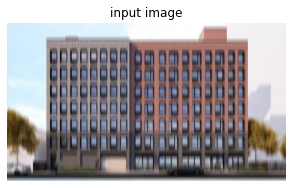

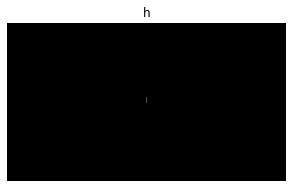

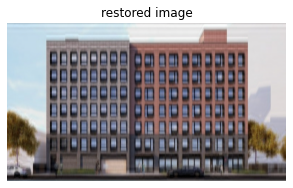

In [6]:
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
h = cv2.imread('h.bmp')
h = cv2.cvtColor(h,cv2.COLOR_BGR2GRAY)
output = image_restoration(img,h)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(h,cmap='gray')
plt.axis('off')
plt.title('h')
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('restored image')

Q2-part2

In [7]:
def smoothing(img):
  '''
  perform image smoothing
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    output (ndarray) : smoothed image
  '''
  output = img.copy()

  ####################
  # start of your code
  output = cv2.GaussianBlur(output,(5,5),3)

  # end of your code
  ####################
  return output

In [8]:
def comput_gradient(img):

  '''
  compute image gradiend magnitude and angle
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
  '''

  mag = np.zeros_like(img)
  angle = np.zeros_like(img)
  ####################
  # start of your code
  gx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
  gy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
  mag = np.sqrt(np.square(gx) + np.square(gy)).astype(np.int32)
  # mag = np.sqrt(np.power(gx,2) + np.power(gy,2)).astype(np.int32)
  angle = (np.arctan2(gy, gx) * 180 / np.pi)

  angle[angle<0] += 360

  # end of your code
  ####################


  return mag,angle

In [9]:
def NMS(mag,angle):
  '''
  perform non-maximum suppression
  **you should Not use libraries here**

  inputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
    
  outputs :
    output (ndarray) : one-pixel width edges
  '''
  output = mag.copy()
  ####################
  # start of your code
  # output *= 0
  for i in range(1, output.shape[0]-1):
    for j in range(1, output.shape[1]-1):
      before = after = 255
      if (0 <= angle[i,j] < 22.5 ) or (337.5 <= angle[i,j] < 360 ) or (157.5 <= angle[i,j] < 202.5):

        before = output[i,j-1]
        after = output[i,j+1]
      elif (22.5 <= angle[i,j] < 67.5 ) or (202.5 <= angle[i,j] < 247.5):
        before = output[i-1,j+1]
        after = output[i+1,j-1]
        
      elif (67.5 <= angle[i,j] < 112.5) or (247.5 <= angle[i,j] < 292.5):
 
        before = output[i-1,j]
        after = output[i+1,j]
      elif (112.5 <= angle[i,j] < 157.5) or (292.5 <= angle[i,j] < 337.5):
        
        before = output[i-1,j-1]
        after = output[i+1,j+1]
      if (output[i,j] >= before) and (output[i,j] >= after):
          # output[i,j] = mag[i,j]
          pass
      else:
          output[i,j] = 0
  # end of your code
  ####################

  return output

In [10]:
def hysteresis_threshold(edges,min_th,max_th):
  '''
  perform two-steps threshold
  **you should Not use libraries here**

  inputs :
    edges (ndarray) : edges of image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
    
  outputs :
    output (ndarray) : final edge image
  '''
  output = edges.copy()
  ####################
  # start of your code

  output[output >= max_th] = 255
  output[output < min_th] = 0
  
  # max_idx = np.asarray(np.where(output >= max_th)).T.tolist()
  # between_idx = np.asarray(np.where(np.logical_and(output >= min_th, output < max_th))).T.tolist()   
  # between_to_max = []
  # for [x, y] in between_idx:

  #   if [x-1,y-1] in max_idx or [x-1,y] in max_idx or [x-1,y+1] in max_idx \
  #     or [x,y-1] in max_idx or [x,y+1] in max_idx \
  #     or [x+1,y-1] in max_idx or [x+1,y] in max_idx or [x+1,y+1] in max_idx:
  #     max_idx.append([x,y])
  #     output[x , y] = 255
    

  output_rows = output.shape[0]
  output_cols = output.shape[1]

  for i in range(1, output_rows - 1):
    for j in range(1, output_cols - 1):
      if min_th <= output[i, j] < max_th:
        if ((output[i+1, j-1] == 255) or (output[i+1, j] == 255) or (output[i+1, j+1] == 255)
                        or (output[i, j-1] == 255) or (output[i, j+1] == 255)
                        or (output[i-1, j-1] == 255) or (output[i-1, j] == 255) or (output[i-1, j+1] == 255)):
                        output[i, j] = 255
  #       # else:
  #       #     output[i, j] = 0


  for i in range(output_rows - 2, 0, -1):
    for j in range(output_cols - 2, 0, -1):
      if min_th <= output[i, j] < max_th:
        if ((output[i+1, j-1] == 255) or (output[i+1, j] == 255) or (output[i+1, j+1] == 255)
                        or (output[i, j-1] == 255) or (output[i, j+1] == 255)
                        or (output[i-1, j-1] == 255) or (output[i-1, j] == 255) or (output[i-1, j+1] == 255)):
                        output[i, j] = 255
  #       # else:
  #       #     output[i, j] = 0

 
  for i in range(1, output_rows - 1):
    for j in range(output_cols - 2, 0, -1):
    
      if min_th <= output[i, j] < max_th:
        if ((output[i+1, j-1] == 255) or (output[i+1, j] == 255) or (output[i+1, j+1] == 255)
                        or (output[i, j-1] == 255) or (output[i, j+1] == 255)
                        or (output[i-1, j-1] == 255) or (output[i-1, j] == 255) or (output[i-1, j+1] == 255)):
                        output[i, j] = 255
  # #       else:
  # #           right_to_left[i, j] = 0


  for i in range(output_rows - 2, 0, -1):
    for j in range(1, output_cols - 1):
      if min_th <= output[i, j] < max_th:
        if ((output[i+1, j-1] == 255) or (output[i+1, j] == 255) or (output[i+1, j+1] == 255)
                        or (output[i, j-1] == 255) or (output[i, j+1] == 255)
                        or (output[i-1, j-1] == 255) or (output[i-1, j] == 255) or (output[i-1, j+1] == 255)):
                        output[i, j] = 255
  #       else:
  #           output[i, j] = 0


  # output_rows = output.shape[0]
  # output_cols = output.shape[1]
  # top_to_bottom = output.copy()
  # for i in range(1, output_rows - 1):
  #   for j in range(1, output_cols - 1):
  #     if min_th <= top_to_bottom[i, j] < max_th:
  #       if ((top_to_bottom[i+1, j-1] == 255) or (top_to_bottom[i+1, j] == 255) or (top_to_bottom[i+1, j+1] == 255)
  #                       or (top_to_bottom[i, j-1] == 255) or (top_to_bottom[i, j+1] == 255)
  #                       or (top_to_bottom[i-1, j-1] == 255) or (top_to_bottom[i-1, j] == 255) or (top_to_bottom[i-1, j+1] == 255)):
  #                       top_to_bottom[i, j] = 255
  #       # else:
  #       #     top_to_bottom[i, j] = 0

  # bottom_to_top  = output.copy()
  # for i in range(output_rows - 2, 0, -1):
  #   for j in range(output_cols - 2, 0, -1):
  #     if min_th <= bottom_to_top[i, j] < max_th:
  #       if ((bottom_to_top[i+1, j-1] == 255) or (bottom_to_top[i+1, j] == 255) or (bottom_to_top[i+1, j+1] == 255)
  #                       or (bottom_to_top[i, j-1] == 255) or (bottom_to_top[i, j+1] == 255)
  #                       or (bottom_to_top[i-1, j-1] == 255) or (bottom_to_top[i-1, j] == 255) or (bottom_to_top[i-1, j+1] == 255)):
  #                       bottom_to_top[i, j] = 255
  #       # else:
  #       #     bottom_to_top[i, j] = 0

  # right_to_left  = output.copy()
  # for i in range(1, output_rows - 1):
  #   for j in range(output_cols - 2, 0, -1):
    
  #     if min_th <= right_to_left[i, j] < max_th:
  #       if ((right_to_left [i+1, j-1] == 255) or (right_to_left [i+1, j] == 255) or (right_to_left [i+1, j+1] == 255)
  #                       or (right_to_left[i, j-1] == 255) or (right_to_left[i, j+1] == 255)
  #                       or (right_to_left[i-1, j-1] == 255) or (right_to_left[i-1, j] == 255) or (right_to_left[i-1, j+1] == 255)):
  #                       right_to_left[i, j] = 255
  #       # else:
  #       #     right_to_left[i, j] = 0

  # left_to_right   = output.copy()
  # for i in range(output_rows - 2, 0, -1):
  #   for j in range(1, output_cols - 1):
  #     if min_th <= left_to_right[i, j] < max_th:
  #       if ((left_to_right[i+1, j-1] == 255) or (left_to_right[i+1, j] == 255) or (left_to_right[i+1, j+1] == 255)
  #                       or (left_to_right[i, j-1] == 255) or (left_to_right[i, j+1] == 255)
  #                       or (left_to_right[i-1, j-1] == 255) or (left_to_right[i-1, j] == 255) or (left_to_right[i-1, j+1] == 255)):
  #                       left_to_right[i, j] = 255
  #       # else:
  #       #     left_to_right [i, j] = 0

  #   output = top_to_bottom + bottom_to_top + right_to_left + left_to_right
    
  #   output[output > 255] = 255
  # end of your code
  ####################

  return output

Text(0.5, 1.0, 'hysteresis_threshold')

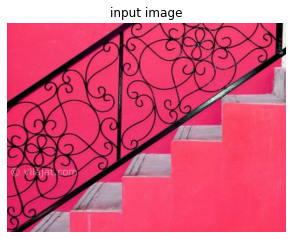

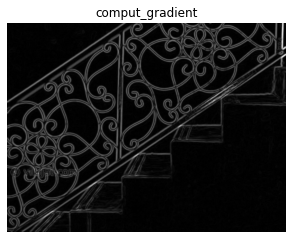

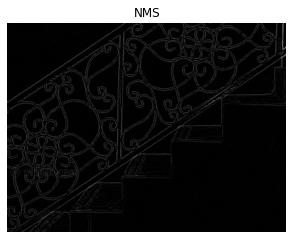

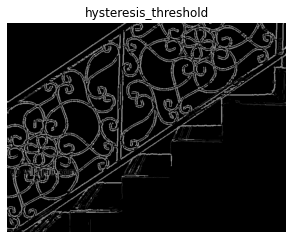

In [11]:

img = img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

GaussBlur = smoothing(image_g)
mag,angle = comput_gradient(GaussBlur)
nms = NMS(mag,angle)
ht = hysteresis_threshold(nms,45,120)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))

plt.imshow(mag,cmap='gray')
plt.axis('off')
plt.title('comput_gradient')
plt.figure(figsize=(5,5))
plt.imshow(nms,cmap='gray')
plt.axis('off')
plt.title('NMS')

plt.figure(figsize=(5,5))
plt.imshow(ht,cmap='gray')
plt.axis('off')
plt.title('hysteresis_threshold')

In [12]:
def canny(img,min_th = 40,max_th=200):
  smooth_img = smoothing(img)
  mag,angle = comput_gradient(smooth_img)
  edges = NMS(mag,angle)
  final_edges = hysteresis_threshold(edges,min_th,max_th)
  return final_edges

In [13]:
def openCV_Canny(img,min_th,max_th):
  '''
  use opencv to get canny edges
  
  inputs:
    img (ndarray): input grayscale image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
  outputs:
    cv2_canny (ndarray) : final edges

  '''

  cv2_canny = np.zeros_like(img)
  ####################
  # start of your code
  cv2_canny = cv2.Canny(img,min_th,max_th, L2gradient=True )
  print(np.max(cv2_canny))
  # end of your code
  ####################


  return cv2_canny

**don't change next cell (run for test)**

255


Text(0.5, 1.0, 'OpenCV Canny')

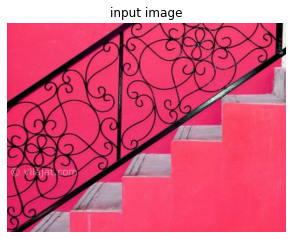

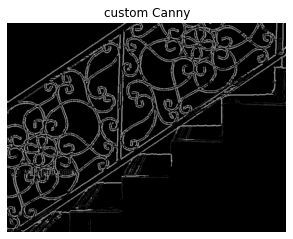

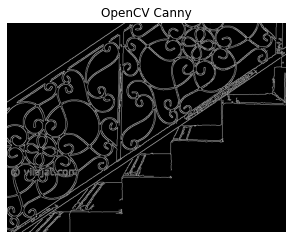

In [14]:
img = img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
min_th,max_th = 40,125
edges = canny(image_g,min_th,max_th)
edges_opencv = openCV_Canny(image_g,min_th,max_th)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.title('custom Canny')
plt.figure(figsize=(5,5))
plt.imshow(edges_opencv,cmap='gray')
plt.axis('off')
plt.title('OpenCV Canny')

Q3-part2

In [15]:
from math import sqrt
 
# Function to find the circle on
# which the given three points lie
def findCircle(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2;
    x13 = x1 - x3;
 
    y12 = y1 - y2;
    y13 = y1 - y3;
 
    y31 = y3 - y1;
    y21 = y2 - y1;
 
    x31 = x3 - x1;
    x21 = x2 - x1;
 
    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2);
 
    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2);
 
    sx21 = pow(x2, 2) - pow(x1, 2);
    sy21 = pow(y2, 2) - pow(y1, 2);
 
    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) // (2 *
          ((y31) * (x12) - (y21) * (x13))));
             
    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) //
          (2 * ((x31) * (y12) - (x21) * (y13))));
 
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1);
 
    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    xc = -g;
    yc = -f;
    sqr_of_r = xc * xc + yc * yc - c;
 
    # r is the radius
    r = round(sqrt(sqr_of_r), 0);
 
    # print("Centre = (", h, ", ", k, ")");
    # print("Radius = ", r);
    return xc, yc, r

In [27]:
# compute proper number of iterations
iterations = int(np.log10(1 - 0.9999) // np.log10(1 - np.power(0.5, 3)))
# print(type(iterations))
def circle_RANSAC(edges):
  '''
  modify RANSAC algorithm to find two circles params
  **you should NOT use libraries here**
  
  inputs:
    edges (ndarray): edges of image
    
  outputs:
    X0s (list) : x location of centers(center of circle)
    Y0s (list) : y location of centers(center of circle)
    rs (list) : raduis of circles

  '''
  global iterations
  x0s = []
  y0s = []
  rs = []
  ####################
  # start of your code
  points = np.asarray(np.where(edges != 0)).T.tolist()
  # print(len(points))
  threshold_distance = 2
  threshold_inlier_count = 20
  # points = random.shuffle(points)
  for iteration in range(iterations):
    
    p1, p2, p3 = random.sample(points, 3)

    xc, yc, r = findCircle(p1[0], p1[1], p2[0], p2[1], p3[0], p3[1])
 
    center = np.array((xc, yc))

    count = 0
    inlier = []
    for point in points:
      point = np.array(point)
      dist = np.linalg.norm(center - point)
      # print(np.abs(dist - r))
      if np.abs(dist - r) <= threshold_distance:
        count += 1
        inlier.append(point)

    # print(count)
    if count >= threshold_inlier_count:
      # print(count)
 
      # print(xc, yc, r)
      x0s.append(int(xc))
      y0s.append(int(yc))
      rs.append(int(r))

  # end of your code
  ####################
  # print(x0s)

  return x0s,y0s,rs


**don't change next cell (run for test)**

Text(0.5, 1.0, 'RANSAC circles')

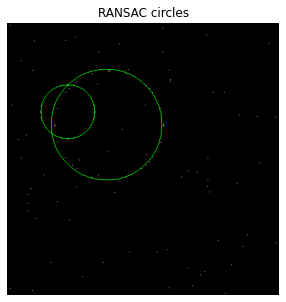

In [28]:
img = cv2.imread('/content/drive/MyDrive/Digital Image Processing/HW5/image3.bmp')
img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
Xs,Ys,rs = circle_RANSAC(img_g)
for i in range(len(Xs)):
  cv2.circle(img,(Ys[i],Xs[i]),rs[i],(0,255,0),1)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('RANSAC circles') 

Q4-part3

In [114]:
def opencv_houghCircles(img):
  '''
  use hough transform to find circle location
  **you should NOT use libraries here**
  
  inputs:
    img (ndarray): input RGB image
    
  outputs:
    output (ndarray): outout image which is input image with green lines on circles

  '''

  output = np.zeros_like(img)
  ####################
  # start of your code
  img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,15,
                            param1=50,param2=20,minRadius=0,maxRadius=0)
  
  circles = np.uint16(np.around(circles))[0]
  for i in range(len(circles)):
    output = cv2.circle(output,(circles[i][0],circles[i][1]),circles[i][2],(0,255,0),1)
  # print(output[0])
  # end of your code
  ####################



  return output

**don't change next cell (run for test)**

Text(0.5, 1.0, 'OpenCV hough circles')

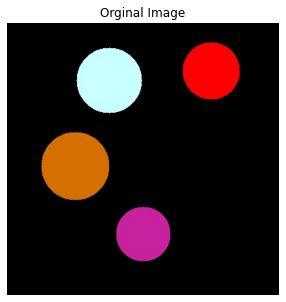

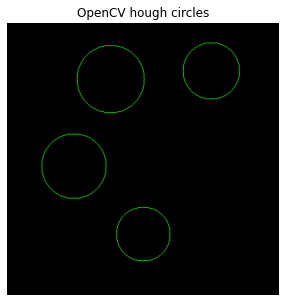

In [115]:
img = cv2.imread('image5.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('Orginal Image') 

output = opencv_houghCircles(img)

plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('OpenCV hough circles') 